# The first phase

In [1]:
# Import packages
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

mlp.__version__

'3.5.1'

In [2]:
df = pd.read_csv('/Users/jax/Desktop/disney_plus_titles.csv') # will not run on  
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [3]:
df.shape


(1450, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [5]:
df["date_added"] = pd.to_datetime(df["date_added"])

In [6]:
df['season'] = df.apply(lambda x : x['duration'].split(" ")[0] if "min" not in x['duration'] else "0", axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "min" in x['duration'] else "0", axis = 1)

In [7]:
df["duration"] = df["duration"].astype("int64")
df["season"] = df["season"].astype("int64")

In [8]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['month_added']=df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

The above helps make the duration data more useable and was referenced from (https://www.kaggle.com/code/kalilurrahman/disney-content-eda-analysis)

In [9]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,season,month_added,month_name_added,year_added
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,2021-11-26,2016,TV-G,23,"Animation, Family",Join Mickey and the gang as they duck the halls!,0,11.0,November,2021.0
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,2021-11-26,1988,PG,91,Comedy,Santa Claus passes his magic bag to a new St. ...,0,11.0,November,2021.0
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,0,11.0,November,2021.0
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,2021-11-26,2021,TV-PG,41,Musical,"This is real life, not just fantasy!",0,11.0,November,2021.0
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,2021-11-25,2021,NaN,0,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,1,11.0,November,2021.0


In [10]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['count'] = 1

The above helps make the country data more useable and was referenced from (https://www.kaggle.com/code/kalilurrahman/disney-content-eda-analysis)

In [11]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,season,month_added,month_name_added,year_added,first_country,count
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",United States,2021-11-26,2016,TV-G,23,"Animation, Family",Join Mickey and the gang as they duck the halls!,0,11.0,November,2021.0,United States,1
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",United States,2021-11-26,1988,PG,91,Comedy,Santa Claus passes his magic bag to a new St. ...,0,11.0,November,2021.0,United States,1
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,0,11.0,November,2021.0,United States,1
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",United States,2021-11-26,2021,TV-PG,41,Musical,"This is real life, not just fantasy!",0,11.0,November,2021.0,United States,1
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",United States,2021-11-25,2021,NaN,0,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,1,11.0,November,2021.0,United States,1


### What variables does the dataset contain?
- show id: a unique identification code
- type: if it is a Movie or a TV Show
- title: name of the Movie or a TV Show
- director: Director(s) of the movie or TV show
- cast: the main members of the cast of the movie or TV show
- country: country of production
- Date added on Disney+: date that the movie or TV show was put on Disney+
- release year: The year the movie or TV show was released
- rating: Rating of the movie or TV show (eg. TV-G, TV-PG)
- duration: Total duration of the movie or TV show



### What type of variable does the dataset contain?
- show id: ordinal continuous
- type: ordinal discrete
- title: ordinal continuous
- director: ordinal continuous
- cast: ordinal continuous
- country: ordinal discrete
- Date added on Disney+: nominal continuous
- release year: nominal continuous
- rating: ordinal discrete
- duration: nominal discrete

### How are they distributed? And are there any relationships among the variables? 

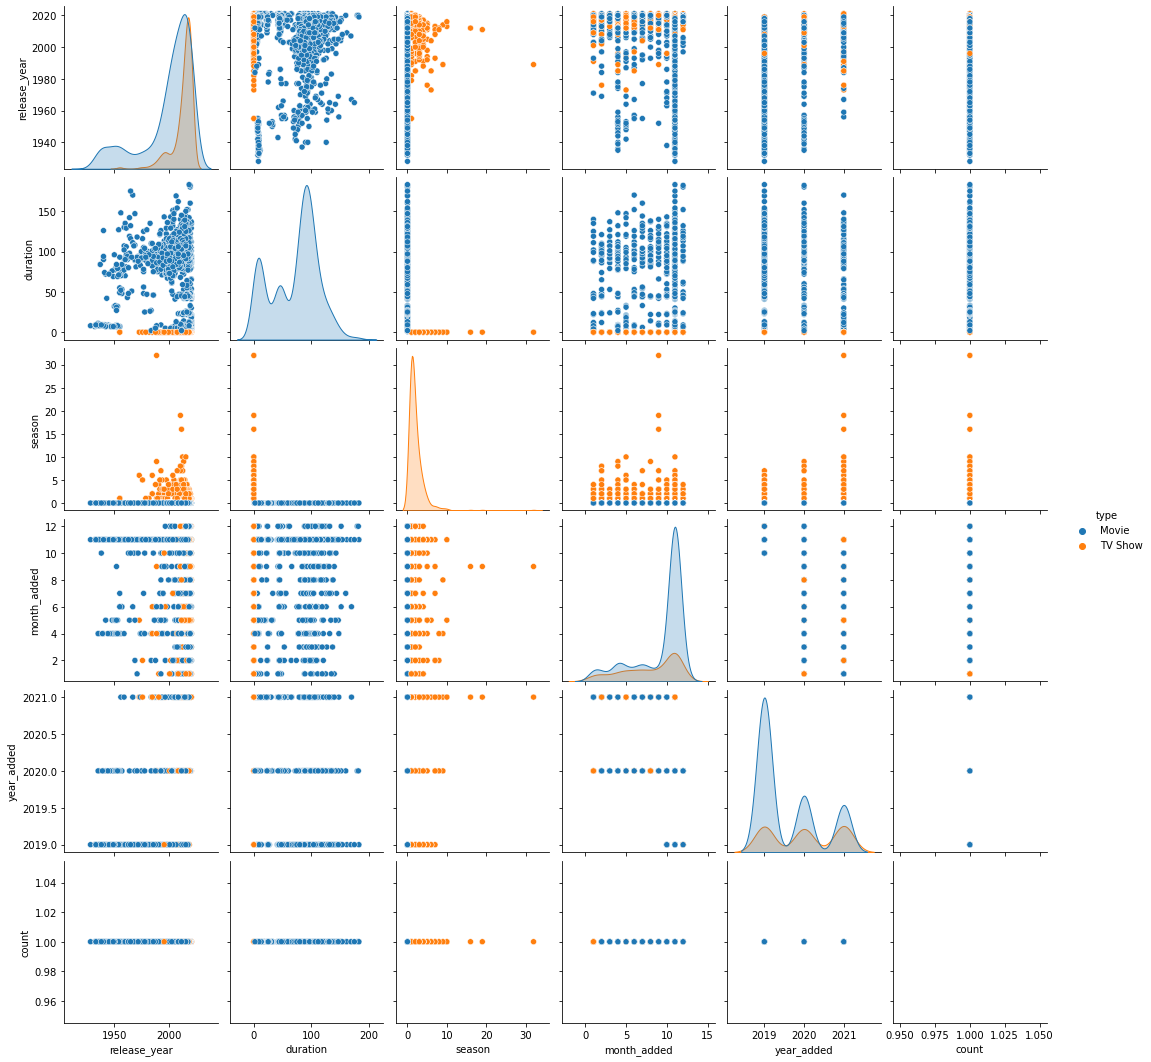

In [12]:
sns.pairplot(df, hue="type")

## Initial set of 5 questions
1. Does Disney+ plus have more movies or TV shows?
2. What ratings are seen the most in Disney+ TV shows and how long do they run for?
3. Dose the duration of movies go up with the rating?
4. What month has the shortest duration in movies overall  
5. What country has the most releases on Disney+?

# The second phase

## 1. Does Disney+ plus have more movies or TV shows?

/Users/jax/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


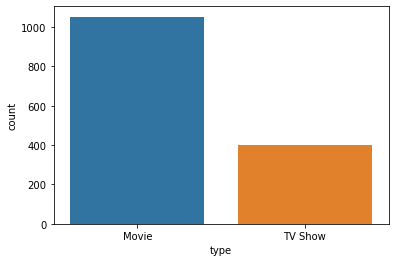

In [13]:
sns.countplot(df.type)
plt.show()
plt.show()

/Users/jax/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


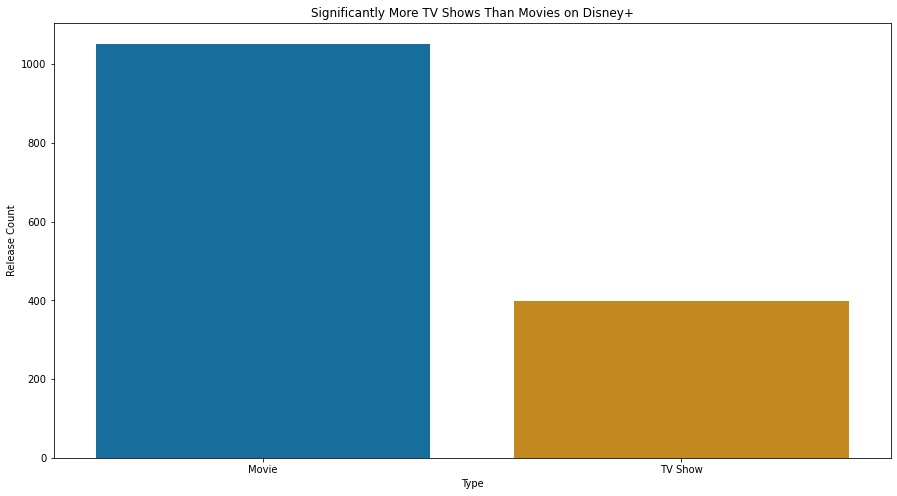

In [14]:
fig, ax = plt.subplots(figsize=(15,8))
sns.countplot(df.type, palette='colorblind',)
ax.set(ylabel='Release Count', xlabel='Type')
ax.set(title='Significantly More TV Shows Than Movies on Disney+')
plt.show()
plt.show()

A bar plot showing the count of movies vs TV shows on Disney+. There is significantly more movie with over 1000 added to the platform while TV shows have a count of just over 400.

Responses to your analysis question: Does Disney+ plus have more movies or TV shows? There are more movies than TV shows.

Caption: I chose a bar plot to show the distribution of amounts of TV shows vs Movies because they are commonplace and thus easy to read. I also chose a bar plot because there are only two amounts and this is a very accessible way to show this small amount. I changed the palette to a color-blind option to aid in accessibility and changed the labels to be capitalized for a cleaner look. I also added a takeaway title and alt text to help gather the big picture idea and be more universally useful.

## 2. What ratings are seen the most in Disney+ TV shows and how long do they run for?

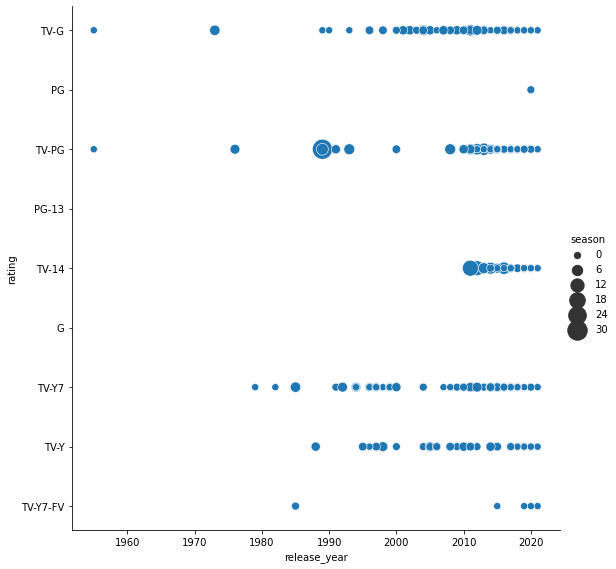

In [15]:
ax = sns.relplot(x=df.loc[df['type'] =='TV Show' ,"release_year"], y="rating", size='season',
            sizes=(40, 400), height=8, data=df)
plt.show()



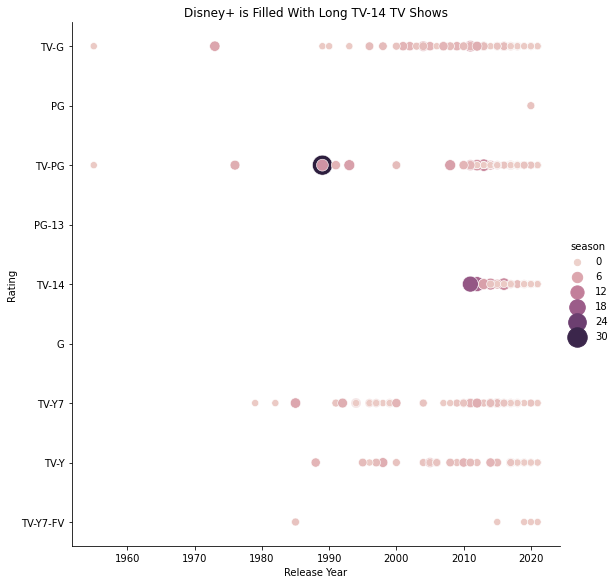

In [16]:
ax = sns.relplot(x=df.loc[df['type'] =='TV Show' ,"release_year"], y="rating", size='season',hue='season',
            sizes=(40, 400), height=8, data=df)
sns.set_palette("colorblind")
ax.set(ylabel='Rating', xlabel='Release Year')
ax.set(title='Disney+ is Filled With Long TV-14 TV Shows')
plt.show()

A relational plot showing TV shows on Disney+ in regards to their rating release year and how many seasons they have. There is a huge cluster of TV-14 TV shows with release years from 2010 to 2020 with more seasons while most other rating categories are more spread out across the release years and have very few seasons with a few outliers.

Responses to your analysis question: What ratings are seen the most in Disney+ TV shows and how long do they run for? There is a huge cluster of TV-14 TV shows with release years from 2010 to 2020 with more seasons while most other rating categories are more spread out across the release years and have very few seasons with a few outliers.

Caption: I chose a relational plot to show all of the relationships I chose to show because it allowed me to show the numerical data of the number of seasons in a visually pleasing and accessible way. I changed the color and size to indicate seasons as well as switched to a colorblind-friendly palette. While it is not normal to do a relational plot with categorical data like ratings I feel that with the changes I made to the chart it looks pleasing, is accessible, and shows the data well.

## 3. Dose the duration of movies go up with the rating?

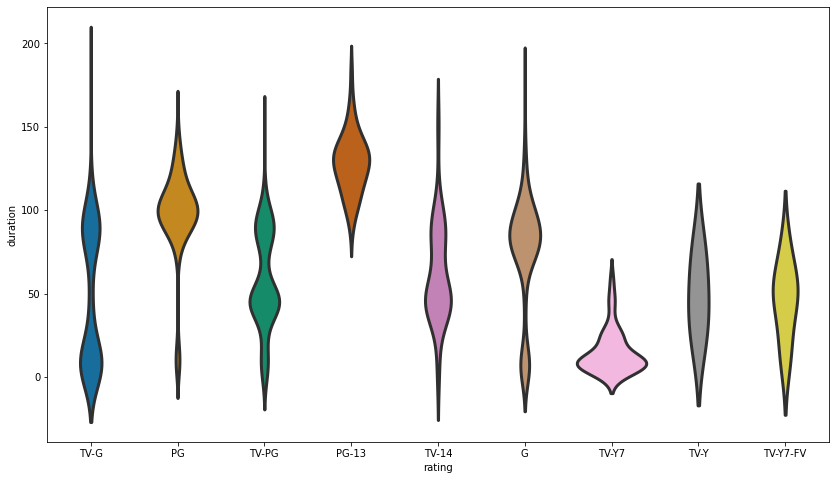

In [17]:
fig, ax = plt.subplots(figsize=(14,8))
sns.violinplot(x='rating', y=df.loc[df['type'] =='Movie' ,'duration'], data=df,
            ax=ax,  linewidth=3, inner=None)
plt.show()

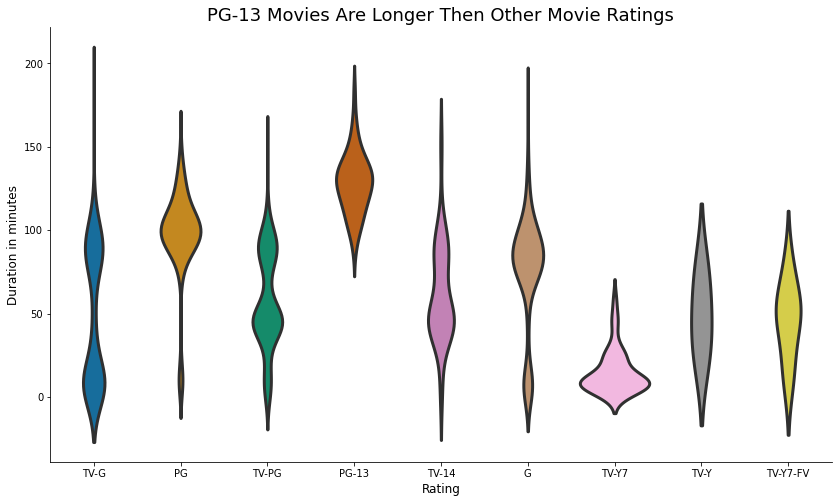

In [18]:
fig, ax = plt.subplots(figsize=(14,8))
sns.violinplot(x='rating', y=df.loc[df['type'] =='Movie' ,'duration'], data=df,
            ax=ax,  linewidth=3, inner=None)
ax.set_xlabel('Rating', size = 12)
ax.set_ylabel('Duration in minutes', size = 12)
ax.set_title('PG-13 Movies Are Longer Then Other Movie Ratings', size = 18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

A violin plot showing movies on Disnye+ with regard to their ratings and durations. Most Ratings are spread out across duration except for PG-13 which shows longer durations and TV-Y7 which shows shorter. 

Responses to your analysis question: Dose the duration of movies go up with the rating? To some degree the duration goes down with a higher rating.

Caption: I chose a violin plot to show this data because it shows the description of amounts well as well as accounting for outliers. I switched to a palette that had equal weights in color to show the data without bias. I changed the sizing of the labels and also the title to aid in accessibility.

## 4. What month has the shortest duration in movies overall    

<AxesSubplot:xlabel='month_added', ylabel='duration'>

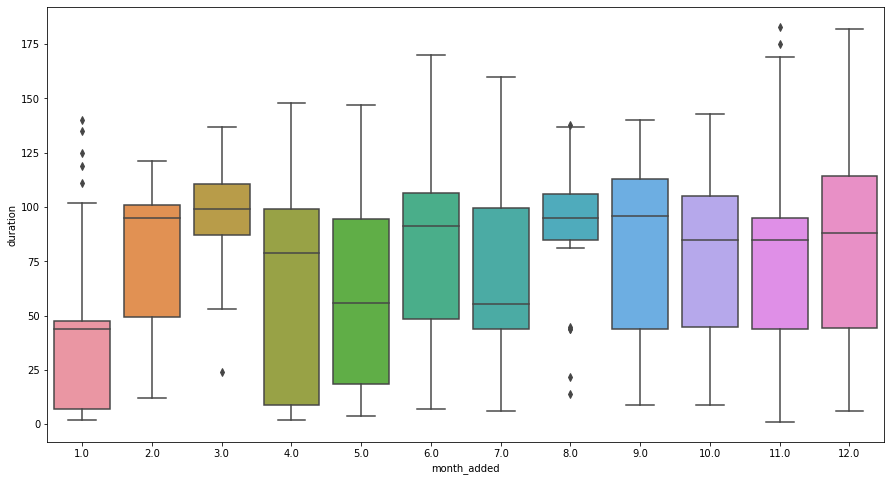

In [19]:
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(x='month_added', y=df.loc[df['type'] =='Movie' ,'duration'], data=df, ax=ax)



[Text(0, 0, 'January'),
 Text(1, 0, 'February'),
 Text(2, 0, 'March'),
 Text(3, 0, 'April'),
 Text(4, 0, 'May'),
 Text(5, 0, 'June'),
 Text(6, 0, 'July'),
 Text(7, 0, 'August'),
 Text(8, 0, 'September'),
 Text(9, 0, 'October'),
 Text(10, 0, 'November'),
 Text(11, 0, 'December')]

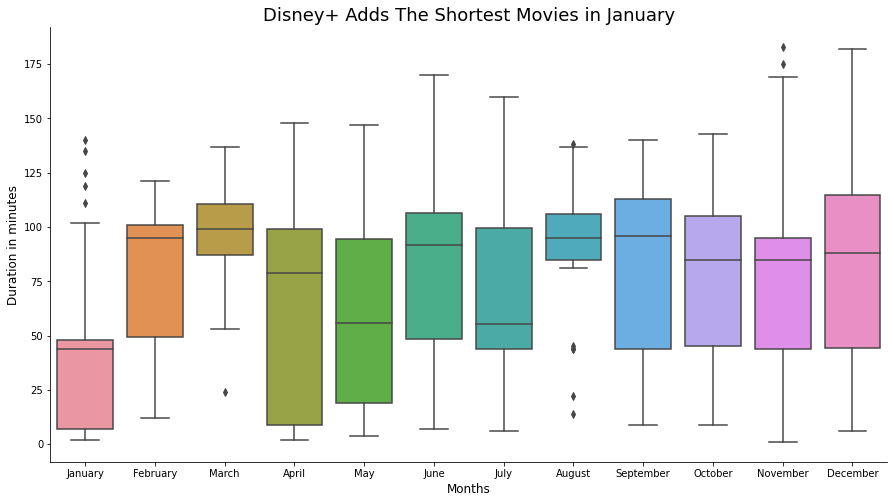

In [20]:
fig, ax = plt.subplots(figsize=(15,8))
sns.set_palette("husl")

sns.boxplot(x='month_added', y=df.loc[df['type'] =='Movie' ,'duration'], data=df, ax=ax)

ax.set_xlabel('Months', size = 12)
ax.set_ylabel('Duration in minutes', size = 12)
ax.set_title('Disney+ Adds The Shortest Movies in January', size = 18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(['January', 'February', 'March', 'April',
                   'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])




A box plot showing movies on Disney+ in relation to their duration and what month they were added to the platform. Most months average around 50 to 100 minutes while in January median falls below 50 minutes.

Responses to your analysis question: What month has the shortest duration in movies overall? The answer is January.


Caption: I chose a box plot to show this data because it easily separates the data to make it easier to see while also showing the median and other statistical values of the data. I switched to a palette that had equal weights in color to show the data without bias. I changed the sizing of the labels and also the title to aid in accessibility. I also changed the monthly labels to show their English names instead of the numbers that were needed to compute the graph.

## 5. What country has the most releases on Disney+?

<BarContainer object of 17 artists>

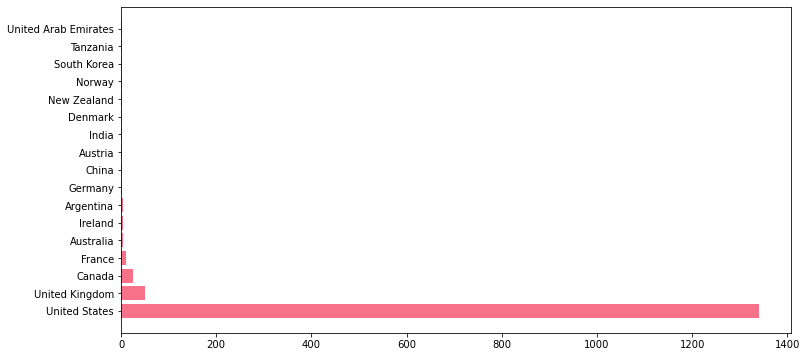

In [21]:
country_data = df.groupby('first_country')['count'].sum().sort_values(ascending=False)

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.barh(country_data.index, country_data)

Text(0.5, 1.0, 'Foreign Releases Lacking on Disney+')

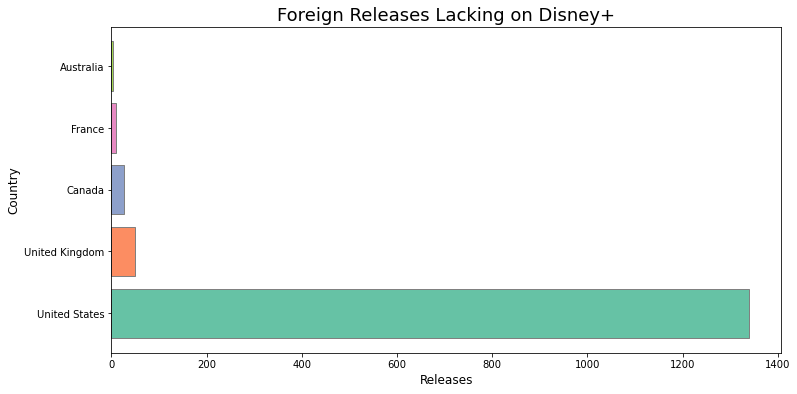

In [22]:
country_data = df.groupby('first_country')['count'].sum().sort_values(ascending=False)[:5]

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.barh(country_data.index, country_data, color=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854'], edgecolor='gray')
ax.set_xlabel('Releases', size = 12)
ax.set_ylabel('Country', size = 12)
ax.set_title('Foreign Releases Lacking on Disney+', size = 18)

A horizontal bar plot showing the top five countries to release content on disney+. The United States is by far the largest with the United Kingdom, Canada, France, and Australia all with less.

Responses to your analysis question: What country has the most releases on Disney+? The U.S. has the most with the UK in second place.

Caption: I chose a horizontal bar graph because I felt it was the most visually pleasing and accessible way to show this data. I feel that having the country labels on the size lets them have enough room and not overlap. I chose the top 5 countries because the release counts under that were very insignificant. I hand-picked a color-blind palette from Color Brewer and changed the size of the title and labels to aid in accessibility.

# Summary of lessons learned

- Look through the data you have thoroughly 
- Always keep in mind what chart is going to work well with the data you have selected for your chart. 
- Having a standard accessible size and color pallet for charts will help the work go quicker and be more consistently accessible. 
- Think about if the data you have can be used to compute the graphs you want I had to change and look for help on how to change the data to come up with the charts I wanted to show and if I had known how unusable some of the data was in the format that it was provided in I might have chosen different variables. 

# Citations

https://www.kaggle.com/code/kalilurrahman/disney-content-eda-analysis

https://www.python-graph-gallery.com/

https://matplotlib.org/stable/gallery/lines_bars_and_markers/index.html

https://colab.research.google.com/drive/1sfIF_IGG-IbjzHU8OGu92hEttlVa562h?usp=sharing

https://colab.research.google.com/drive/1ucsOQkzzWYWVjxFSh18KhZ3PWBik-J72?usp=sharing

https://colab.research.google.com/drive/12Ds7Xsr0FnzccRSFnNPT0pC3_-2bPhqp?usp=sharing

https://colab.research.google.com/drive/1Ww28twaicgRf3ayzkg6cx7ipL1NoMncH?usp=sharing